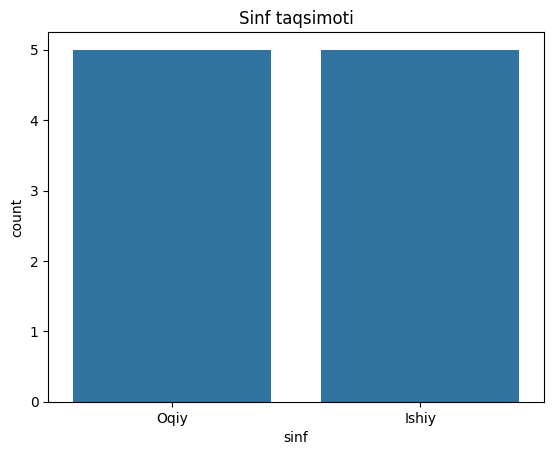

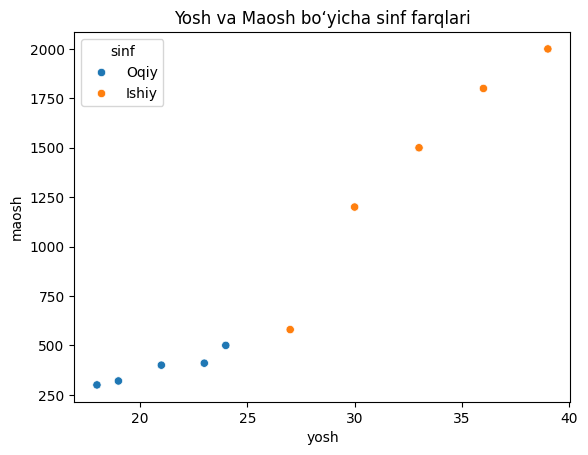

MSE: 21145.345
R2: 0.9613854181884587


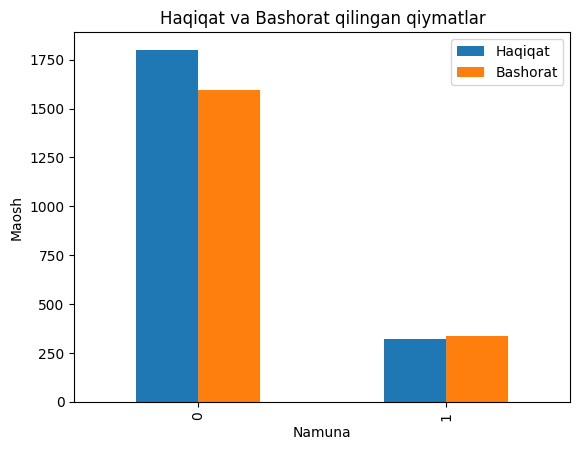

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


data = {
    "yosh": [18, 19, 21, 23, 24, 27, 30, 33, 36, 39],
    "maosh": [300, 320, 400, 410, 500, 580, 1200, 1500, 1800, 2000],
    "sinf": ["Oqiy", "Oqiy", "Oqiy", "Oqiy", "Oqiy", "Ishiy", "Ishiy", "Ishiy", "Ishiy", "Ishiy"]
}
df = pd.DataFrame(data)


sns.countplot(x="sinf", data=df)
plt.title("Sinf taqsimoti")
plt.show()


sns.scatterplot(x="yosh", y="maosh", hue="sinf", data=df)
plt.title("Yosh va Maosh bo‘yicha sinf farqlari")
plt.show()


df["sinf"] = df["sinf"].map({"Oqiy": 0, "Ishiy": 1})


X = df[["yosh", "sinf"]]
y = df["maosh"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

result = pd.DataFrame({"Haqiqat": y_test, "Bashorat": y_pred})
result = result.reset_index(drop=True)

bar = result.plot(kind="bar")
plt.title("Haqiqat va Bashorat qilingan qiymatlar")
plt.xlabel("Namuna")
plt.ylabel("Maosh")
plt.show()